## Introduction
### This project is aimed to find a best regression model on dataset of wines. "Target" is the response variables, which is the number of cases of wine sold. The explanatory variables are:

#### INDEX: The Unique ID of wine, it assigns unique codes to different wines. It's a lot like ISBN for books. Each wine has a unique numerical code and display name which can be shared automatically.
#### AcidIndex: Measures total acidity of wine via a weighted average.
#### Alcohol: Alcohol Content, the percent alcohol content of the wine
#### Chlorides: Chloride content of the wine, the amount of salt in the wine
#### CitricAcid: Citric Acid content of the wine, found in small quantities, citric acid can add ‘freshness’ and flavor to wines
#### Density: Density of the wine, the density of water is close to that of water depending on the percent alcohol and sugar content
#### FixedAcidity: FixedAcidity of the wine, do not evaporate readily
#### FreeSulfurDioxide: Sulfur Dioxide content of the wine. the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
#### LabelAppeal: Subjective marketing score that indicates the appeal of the design of the label on the bottle
#### ResidualSugar: Residual sugar content of the wine, the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
#### STARS: Wine rating as determined by experts (4 = excellent; 1 =Poor)
#### Sulphates: Sulfate content of the wine, a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
#### TotalSulfurDioxide: Total sulfur dioxide content of the wine, amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
#### VolatileAcidity: Volatile acid content of the wine, the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
#### pH: pH of the wine, describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

### I would impute the missing values first, analyze single variable, check the correlations, then apply multiple linear regression model, poisson regression model and negative binomial regression model, to determine which model and what regressors are the best.

In [138]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

import pandas as pd
data = pd.read_excel("M3_Data.xls")
datas = pd.read_excel("Project1_Eval.xls")

## Data preprocessing
### To begin my data prepocessing, first I want to check what the types of data are in different features, check what are categorical variables, what are numeric variables, what type of numeric values are in numeric variables:

In [94]:
#check the types of data 
data.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

### After checking data types, I found there are 16 objects, which are all numeric attributes, of which 12 are float types and 4 are int types.

In [ ]:
#Check the data shape
print(data.shape)
data.head(5)

### After checking the data shape, I found there are 12795 rows and 16 columns in the whole data set, which means there should be 12795*16 = 204720 datas in whole if there are no missing values.

### Next step, I will do a descriptive statistics check on data:

In [60]:
#Do a descriptive statistics check on data
data_desc = data.describe()
data_desc

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


## After descriptive statistic checking on data, I found:

#### 1.There are 12157 counts in ResidualSugar, 12157 counts in Chlorides, 12148 counts in FreeSulfurDioxide, 12113 counts in TotalSulferDioxide, 12400 counts in pH, 11585 counts in Sulphates, 12142 counts in Alcohol, 9436 counts in STARS. From these information, I guessed that ResidualSugar has 12795 - 12157 = 638 missing values, Chlorides has 12795 - 12157 = 638 missing values, FreeSulfurDioxide has 12795 - 12148 = 647 missing values, Density has 12795 - 12113 = 682 missing values, pH has 12795 - 12400 = 395 missing values, Sulphates has 12795 - 11585 = 1210 missing values, Alcohol has 12795 - 12142 = 653 missing values, STARS has 12795 - 9436 = 3359 missing values.
#### 2. Attribute LabelAppeal's mean is a negative value, which means there might be a lot of negative values in this attribute, the min value of FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates, Alcohol and LabelAppeal are negative values, which means these attributes have negative values. The min value of INDEX, Density, pH, AcidIndex, STARS are positve, which means those attributes do not have negative values.
#### 3. The min value of TARGET 0.00, which means the response variables are non-negative values.
#### 4. 25% of ResidualSugar values are -2.00, 25% of Chlorides values are -0.031, 25% of LabelAppeal values are -1.00, which means these attributes have the most numbers of negative values.

## Check the proportion of missing values in each attribute:

In [3]:
null_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol','STARS']
total_rows = data.shape[0]
for each_col in null_cols:
    print('{}:{}'.format(each_col, data[pd.isnull(data[each_col])].shape[0] / total_rows))

ResidualSugar:0.04814380617428683
Chlorides:0.0498632278233685
FreeSulfurDioxide:0.050566627588901916
TotalSulfurDioxide:0.05330207112153185
pH:0.03087143415396639
Sulphates:0.09456819069949199
Alcohol:0.051035560765924186
STARS:0.2625244236029699


#### From the proportion of missing values in each attribute, I could see there are no attribute which has less than 1% missing values, which means I could not use Listwise or case deletion. 



## Mean substitution:
### In a mean substitution, the mean value of a variable is used in place of the missing data value for that same variable. The theoretical background of the mean substitution is that the mean is a reasonable estimate for a randomly selected observation from a normal distribution. So let's check whether it is suitable to use mean substitution in ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, Alcohol, and STARS by checking their distributions in the following:

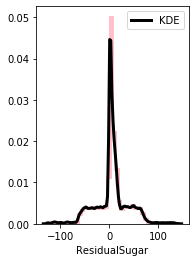

In [125]:
#histogram
plt.subplot(122)
x = data['ResidualSugar'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

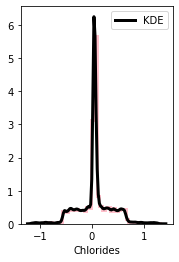

In [126]:
#histogram
plt.subplot(122)
x = data['Chlorides'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

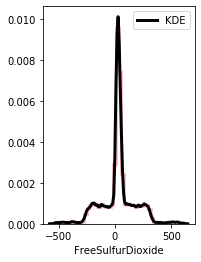

In [127]:
#histogram
plt.subplot(122)
x = data['FreeSulfurDioxide'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

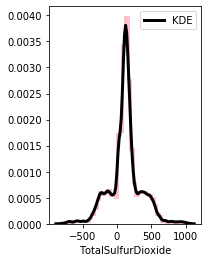

In [128]:
#histogram
plt.subplot(122)
x = data['TotalSulfurDioxide'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

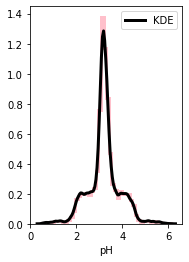

In [129]:
#histogram
plt.subplot(122)
x = data['pH'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

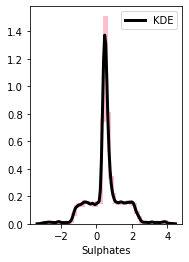

In [130]:
#histogram
plt.subplot(122)
x = data['Sulphates'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

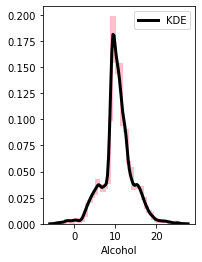

In [131]:
#histogram
plt.subplot(122)
x = data['Alcohol'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

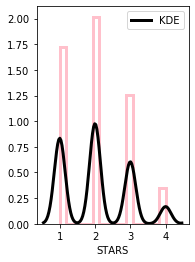

In [132]:
#histogram
plt.subplot(122)
x = data['STARS'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

## The figures above manifests that except STARS, although others mimick the normal distribution, but none of those attributes perfectly satisfy the normal distribution, for safety, I would change to another method:

### Filling in missing data using KNN method: 

#### I chose to use KNN imputer to fill in missing data:

In [139]:
from sklearn.impute import KNNImputer
df = data['ResidualSugar'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['ResidualSugar'] = imputer.fit_transform(df)
from sklearn.impute import KNNImputer
df = data['Chlorides'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['Chlorides'] = imputer.fit_transform(df)
from sklearn.impute import KNNImputer
df = data['pH'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['pH'] = imputer.fit_transform(df)
from sklearn.impute import KNNImputer
df = data['TotalSulfurDioxide'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['TotalSulfurDioxide'] = imputer.fit_transform(df)
from sklearn.impute import KNNImputer
df = data['Sulphates'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['Sulphates'] = imputer.fit_transform(df)
from sklearn.impute import KNNImputer
df = data['Alcohol'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['Alcohol'] = imputer.fit_transform(df)
from sklearn.impute import KNNImputer
df = data['STARS'].values.reshape(-1, 1)
imputer = KNNImputer(n_neighbors=2)
data['STARS'] = imputer.fit_transform(df)

### After standarized and filled the missing values, Let's check the description of the data:

In [134]:
#Do a descriptive statistics check on data
data_desc = data.describe()
data_desc

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,1.279500e+04,1.279500e+04,12148.000000,1.279500e+04,12795.000000,1.279500e+04,1.279500e+04,1.279500e+04,12795.000000,12795.000000,12795.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,1.521947e-17,1.585073e-17,30.845571,2.226520e-17,0.994203,2.169772e-16,4.409655e-17,9.549046e-17,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,9.756693e-01,9.747877e-01,148.714558,9.730221e-01,0.026538,9.844817e-01,9.515790e-01,9.741861e-01,0.891089,1.323926,0.775058
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-3.947456e+00,-3.849290e+00,-555.000000,-4.069424e+00,0.888090,-4.013227e+00,-3.923565e+00,-4.074732e+00,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-1.338963e-01,-1.721519e-01,0.000000,-3.739236e-01,0.987720,-3.496283e-01,-2.007445e-01,-3.726826e-01,-1.000000,7.000000,2.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,-1.537078e-02,-2.142377e-02,30.000000,3.402252e-17,0.994490,2.200390e-16,4.047978e-17,9.714223e-17,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,2.809431e-01,2.297898e-01,70.000000,3.332667e-01,1.000515,3.566076e-01,2.605848e-01,4.589370e-01,1.000000,8.000000,2.041755
max,16129.000000,8.000000,34.400000,3.680000,3.860000,4.021906e+00,4.070216e+00,623.000000,4.037391e+00,1.099240,4.299758e+00,3.983405e+00,4.295118e+00,2.000000,17.000000,4.000000


## EDA(Exploratory Data Analysis )
### Exploratory Data Analysis,is an approach to analyze data in order to:
#### 1. summarize main characteristics of the data
#### 2. gain better understanding of the data-set,
#### 3. uncover relationships between different variables, and
#### 4. extract important variables for the problem we are trying to solve

### The question here is to find “ what sampling contribute more to cases of wine sold?"

## Single Variable Analysis

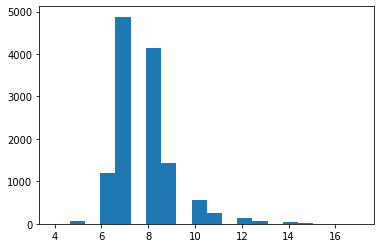

In [57]:
import matplotlib.pyplot as plt

data = data['AcidIndex']
plt.hist(data, bins = 20)
plt.show()

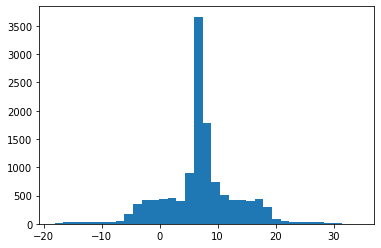

In [69]:
import matplotlib.pyplot as plt

data = data['FixedAcidity']
plt.hist(data, bins = 35)
plt.show()

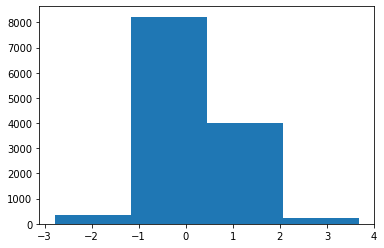

In [75]:
import matplotlib.pyplot as plt

data = data['VolatileAcidity']
plt.hist(data, bins = 4)
plt.show()

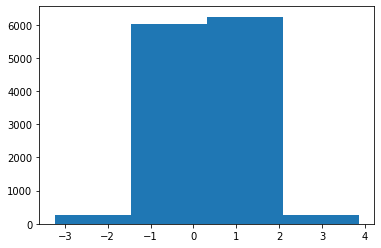

In [77]:
import matplotlib.pyplot as plt

data = data['CitricAcid']
plt.hist(data, bins = 4)
plt.show()

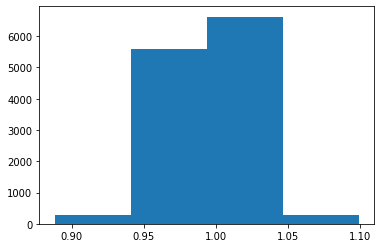

In [90]:
import matplotlib.pyplot as plt

data = data['Density']
plt.hist(data, bins = 4)
plt.show()

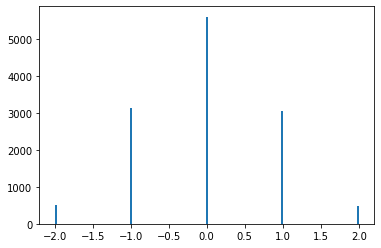

In [92]:
import matplotlib.pyplot as plt

data = data['LabelAppeal']
plt.hist(data, bins = 145)
plt.show()

### Most of the variables are normally distributed except STARS. These variables mentioned below are transformed to log scale for a normally distributed dataset:

#### fixed acidity, volatile acidity, residual sugar, chlorides.

In [138]:
FixedAcidity = np.log(data['FixedAcidity'], dtype='float64')
VolatileAcidity = np.log(data['VolatileAcidity'], dtype='float64')
ResidualSugar = np.log(data['ResidualSugar'], dtype='float64')
Chlorides = np.log(data['Chlorides'], dtype='float64')


## Feature extraction:
### In the dataset, I found Sulphates is Sulfate content of the wine, a wine additive which can contribute to sulfur dioxide gas (S02) levels, the more sulphates, there must be more FreeSulfurDioxide, also more TotalSulfurDioxide. Therefore, Sulphates, FreeSulfurDioxide and Total Sulfur Dioxide could be extracted as " (Sulphate / Free Sulfur Dioxide) * (Free sulfur Dioxide / Total Sulfur Dioxide) = (Sulphate / Total Sulfur Dioxide)" as how much Sulphate one unit of Sulfur Dioxidecould contribute, labeled as "SUSD", and drop the attribute "FreeSulfurDioxide"

In [133]:
data['SUSD']  = data.Sulphates / data.TotalSulfurDioxide 
data.drop(['TotalSulfurDioxide','Sulphates','FreeSulfurDioxide'],axis = 1, inplace = True)

### Also, every wine has a unique INDEX which is useless to measure their contribution on wine sold, so I will drop this attribute:

In [ ]:
data = data.drop('INDEX', axis=1)

## Scatterplot

### In a scatterplot, I set the predictor variable on the x-axis, or horizontal axis and I set the target variable on the y-axis or vertical axis.

### Let's plot plenty of scatter point to see which features have more tendency to have better linear relationship with TARGET.
 
#### I will do scatter plot with features in the following sequence: FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, Density, pH, SUSD, Alcohol, LabelAppeal, AcidIndex, STARS. 

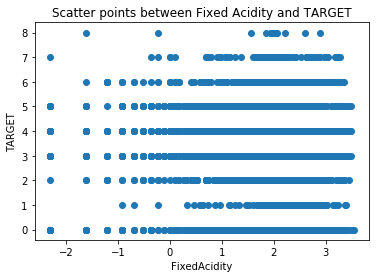

In [139]:
x = FixedAcidity
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Fixed Acidity and TARGET')
plt.xlabel('FixedAcidity')
plt.ylabel('TARGET')
plt.show()

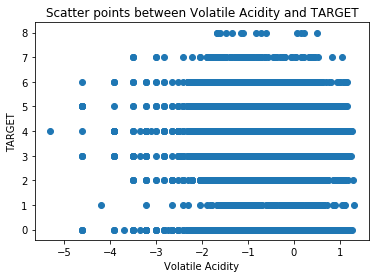

In [107]:
x = VolatileAcidity
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Volatile Acidity and TARGET')
plt.xlabel('Volatile Acidity')
plt.ylabel('TARGET')
plt.show()

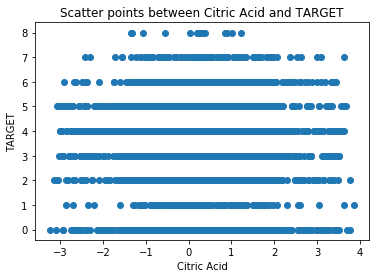

In [108]:
x = data['CitricAcid']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Citric Acid and TARGET')
plt.xlabel('Citric Acid')
plt.ylabel('TARGET')
plt.show()

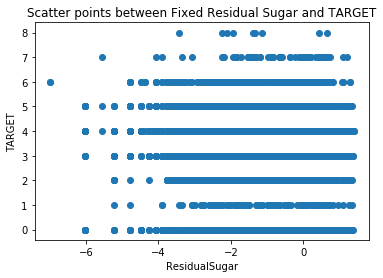

In [109]:
x = ResidualSugar
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Fixed Residual Sugar and TARGET')
plt.xlabel('ResidualSugar')
plt.ylabel('TARGET')
plt.show()

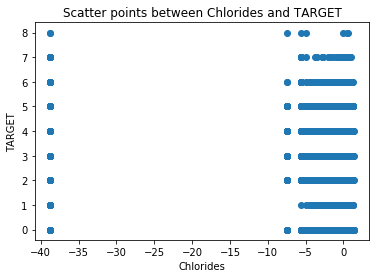

In [110]:
x = Chlorides
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Chlorides and TARGET')
plt.xlabel('Chlorides')
plt.ylabel('TARGET')
plt.show()

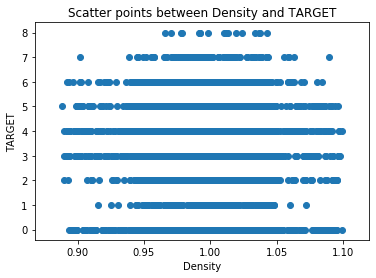

In [112]:
x = data['Density']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Density and TARGET')
plt.xlabel('Density')
plt.ylabel('TARGET')
plt.show()

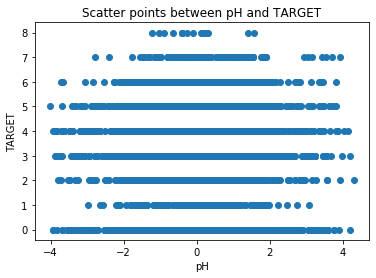

In [113]:
x = data['pH']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between pH and TARGET')
plt.xlabel('pH')
plt.ylabel('TARGET')
plt.show()

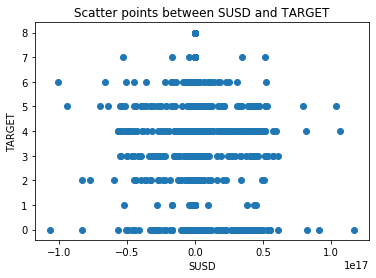

In [114]:
x = data['SUSD']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between SUSD and TARGET')
plt.xlabel('SUSD')
plt.ylabel('TARGET')
plt.show()

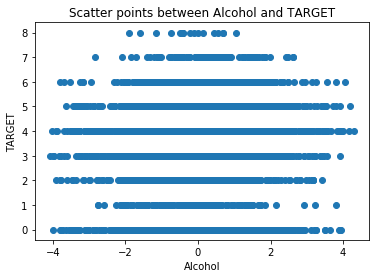

In [115]:
x = data['Alcohol']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Alcohol and TARGET')
plt.xlabel('Alcohol')
plt.ylabel('TARGET')
plt.show()

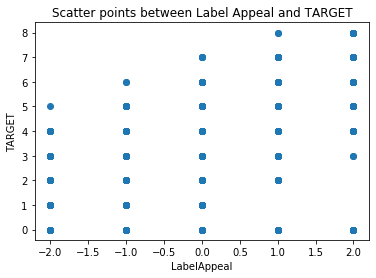

In [116]:
x = data['LabelAppeal']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Label Appeal and TARGET')
plt.xlabel('LabelAppeal')
plt.ylabel('TARGET')
plt.show()

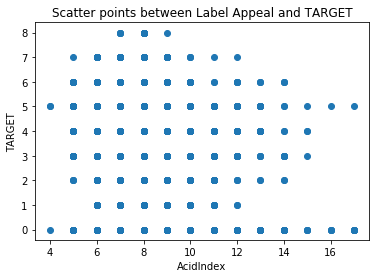

In [117]:
x = data['AcidIndex']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between Acid Index and TARGET')
plt.xlabel('AcidIndex')
plt.ylabel('TARGET')
plt.show()

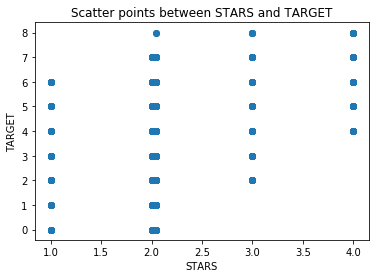

In [140]:
x = data['STARS']
y = data['TARGET']
plt.scatter(x,y)
plt.title('Scatter points between STARS and TARGET')
plt.xlabel('STARS')
plt.ylabel('TARGET')
plt.show()

### None of these pairs manifest the linear relationship with TARGET.

## Correlation

### To check whether there are multicollinearities between dfferent independent variables, it is crucial to check the correlations.

## For better analysis, Let's plot heatmap for correlation matrix

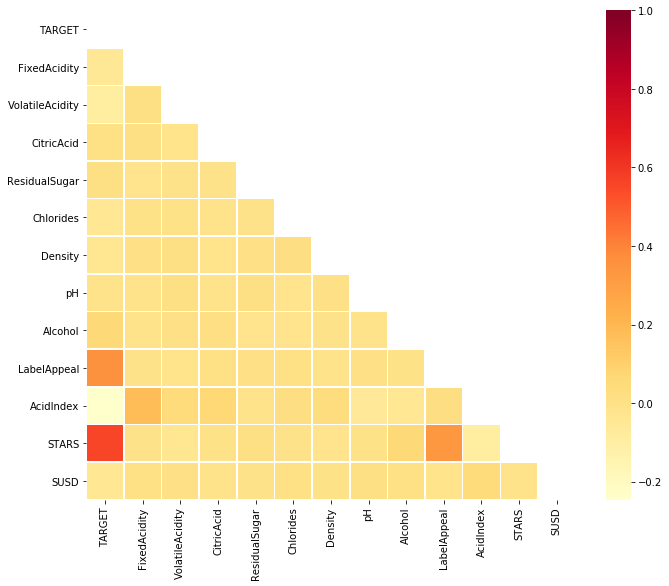

In [136]:
cor_matrix = data.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
#Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlOrRd")

### The strongest correlation is found to be between LabelAppeal and TARGET, STARS and TARGET, FixedAcidity and AcidIndex, LabelAppeal and STARS.


## Build Models
### Since we are dealing with count variables, I will start with the classical Poisson regression; then I will enhance it using model Negative binominal model.

### In addition, I will also create models using multiple linear regression.

### Using original and transformed datasets, we will build at least six models as follow:
#### - Two Linear regression models
#### - Two Poisson models
#### - Two Negative binomial models

## 1.0 Multiple linear regression model 1:

### Let's try to check multicollinearity of features, then apply for linear regression model:

### Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar',
          'Chlorides','pH','Alcohol','LabelAppeal','AcidIndex','STARS','SUSD']]
calc_vif(X)

,variables,VIF
0,FixedAcidity,0.443611
1,VolatileAcidity,0.854046
2,CitricAcid,0.886570
3,ResidualSugar,1.000066
4,Chlorides,1.000024
5,pH,1.000002
6,Alcohol,1.000005
7,LabelAppeal,0.999976
8,AcidIndex,0.028196
9,STARS,0.125957


### From the VIF table I would see the values of VIF is pretty low, I would pick the lowest four of them to do multiple linear regression model: AcidIndex, STARS, FixedAcidity, VolatileAcidity.

In [118]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression() 
X = data[['FixedAcidity','VolatileAcidity',
          'AcidIndex','STARS']]
model = regr.fit(X, data[['TARGET']])

In [101]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

[3.67716702]
[[-0.00222629 -0.16734058 -0.31615244  0.92041442]]


In [121]:
model.score(X, data[['TARGET']])

0.20306931803519312

### TARGET = 3.67716702 -0.00222629*FixedAcidity -0.16734058*VolatileAcidity -0.31615244*AcidIndex + 0.92041442*STARS


## 1.1 Multiple linear regression model 2:

### I would pick the another four of them to do multiple linear regression model: AcidIndex, CitricAcid, LabelAppeal, pH.

In [122]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression() 
X = data[['AcidIndex','CitricAcid',
          'LabelAppeal','pH']]
model = regr.fit(X, data[['TARGET']])

In [103]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

[5.93834724]
[[-0.37535291  0.0497761   0.78430018 -0.04908511]]


In [123]:
model.score(X, data[['TARGET']])

0.19324005627768046

### TARGET = 5.93834724 - 0.37535291*AcidIndex + 0.0497761*CitricAcid + 0.78430018*LabelAppeal - 0.04908511*pH

## Poisson Model 1
### I will explore the Poisson regression model using original data with replacing all missing data with KNN method.

#### First I will check Possion regression one regressor by one regressor to see which coefficient is highly significant.

In [5]:
FixedAcidity = data['FixedAcidity']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ FixedAcidity', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27383.
Date:                Sat, 27 Jun 2020   Deviance:                       22823.
Time:                        19:14:41   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1427      0.008    152.223   

In [6]:
VolatileAcidity = data['VolatileAcidity']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ VolatileAcidity', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27340.
Date:                Sat, 27 Jun 2020   Deviance:                       22737.
Time:                        19:14:49   Pearson chi2:                 1.56e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1300      0.005    2

In [7]:
CitricAcid = data['CitricAcid']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ CitricAcid', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27401.
Date:                Sat, 27 Jun 2020   Deviance:                       22860.
Time:                        19:14:53   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1063      0.005    204.696      0.0

In [8]:
ResidualSugar = data['ResidualSugar']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ ResidualSugar', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27399.
Date:                Sat, 27 Jun 2020   Deviance:                       22857.
Time:                        19:14:56   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1082      0.005    218.159

In [9]:
Chlorides = data['Chlorides']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ Chlorides', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27391.
Date:                Sat, 27 Jun 2020   Deviance:                       22839.
Time:                        19:14:59   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1080      0.005    218.064      0.0

In [10]:
FreeSulfurDioxide = data['FreeSulfurDioxide']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ FreeSulfurDioxide', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12148
Model:                            GLM   Df Residuals:                    12146
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25999.
Date:                Sat, 27 Jun 2020   Deviance:                       21669.
Time:                        19:15:03   Pearson chi2:                 1.49e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1021      0.00

In [11]:
TotalSulfurDioxide = data['TotalSulfurDioxide']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ TotalSulfurDioxide', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27382.
Date:                Sat, 27 Jun 2020   Deviance:                       22822.
Time:                        19:15:06   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1077      0

In [12]:
Density = data['Density']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ Density', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27392.
Date:                Sat, 27 Jun 2020   Deviance:                       22841.
Time:                        19:15:09   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9539      0.190     10.274      0.0

In [13]:
pH = data['pH']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ pH', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27401.
Date:                Sat, 27 Jun 2020   Deviance:                       22860.
Time:                        19:15:12   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1082      0.005    218.173      0.0

In [14]:
Sulphates = data['Sulphates']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ Sulphates', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27391.
Date:                Sat, 27 Jun 2020   Deviance:                       22840.
Time:                        19:15:16   Pearson chi2:                 1.57e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1080      0.005    218.066      0.0

In [15]:
Alcohol = data['Alcohol']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ Alcohol', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27373.
Date:                Sat, 27 Jun 2020   Deviance:                       22804.
Time:                        19:15:19   Pearson chi2:                 1.56e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1075      0.005    217.874      0.0

In [16]:
LabelAppeal = data['LabelAppeal']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ LabelAppeal', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26405.
Date:                Sat, 27 Jun 2020   Deviance:                       20868.
Time:                        19:15:22   Pearson chi2:                 1.33e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0848      0.005    208.705      

In [17]:
AcidIndex = data['AcidIndex']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ AcidIndex', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26883.
Date:                Sat, 27 Jun 2020   Deviance:                       21825.
Time:                        19:15:26   Pearson chi2:                 1.55e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1416      0.033     64.144      0.0

In [18]:
STARS = data['STARS']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ STARS', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12793
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26276.
Date:                Sat, 27 Jun 2020   Deviance:                       20609.
Time:                        19:15:29   Pearson chi2:                 1.41e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4697      0.015     31.913      0.0

### The coefficents of FixedAcidity, VolatileAcidity, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, Sulphates, Alcohol, LabelAppeal, AcidIndex, STARS are highly significant checked by p-values.

### Comparing from standard errors, FreeSulfurDioxide, FixedAcidity, AcidIndex have the smallest standard errors.

### Therefore, I choose to construct poission regression models on those regressors:

In [140]:
FreeSulfurDioxide = data['FreeSulfurDioxide']
FixedAcidity = data['FixedAcidity']
AcidIndex = data['AcidIndex']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ FreeSulfurDioxide*FixedAcidity*AcidIndex', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12148
Model:                            GLM   Df Residuals:                    12140
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25484.
Date:                Sun, 28 Jun 2020   Deviance:                       20640.
Time:                        21:40:02   Pearson chi2:                 1.47e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Interpretation Poisson Model 1
### From this output, we have the following estimated model:
### $y = e^{B_{0}x_{0}+B_{1}x_{1}+B_{2}x_{2}+B_{3}x_{3}}$

### where
### $B_0=1.951$
### $B_1=−0.0012$
### $B_2=0.0254$
### $B_3=-0.1093$


### and

### $x_0=1$
### $x_1=FreeSulfurDioxide$
### $x_2=FixedAcidity$
### $x_3=AcidIndex$

## Coefficient Analysis

### Unlike the linear model, in order to interpret the slope coefficient in a Poisson regression, it makes better sense to look at the ratio of predicted responses (instead of the difference) for a unit increase in x. 

Hence, for a unit increase in our highly significant variables:
- FreeSulfurDioxide, we expect a decrease of $e^{-0.0012}$=0.99880071971 the number of cases of wine that will be sold
- TotalSulfurDioxide, we expect an increase of $e^{0.0254}$=1.02572532861 the number of cases of wine that will be sold
- AcidIndex,we expect a decrease of $e^{-0.1093}$=0.89646143872 the number of cases of wine that will be sold


## Poisson Model 2
### I will explore the Poisson regression model using original data with replacing all missing data with KNN method.

### Also, I would construct Poisson regression model on STARS and LabelAppeal since they have strong relation with TARGET when checked by correlation matrix. 

In [20]:
STARS = data['STARS']
LabelAppeal = data['LabelAppeal']
TARGET = data['TARGET']
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by width
model = glm('TARGET ~ STARS*LabelAppeal', data = data, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12791
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25749.
Date:                Sat, 27 Jun 2020   Deviance:                       19556.
Time:                        20:59:55   Pearson chi2:                 1.26e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6132      0.01

## Interpretation Poisson Model 2
### From this output, we have the following estimated model:
### $y = e^{B_{0}x_{0}+B_{1}x_{1}+B_{2}x_{2}}$

### where
### $B_0=0.6132$
### $B_1=0.2201$
### $B_2=0.1114$


### and

### $x_0=1$
### $x_1=STARS$
### $x_2=LabelAppeal$


## Coefficient Analysis

### Unlike the linear model, in order to interpret the slope coefficient in a Poisson regression, it makes better sense to look at the ratio of predicted responses (instead of the difference) for a unit increase in x. 

Hence, for a unit increase in our highly significant variables:
- STARS, we expect an increase of $e^{0.2201}$=1.24620134449 the number of cases of wine that will be sold
- LabelAppeal, we expect an increase of $e^{0.1114}$=1.11784195422 the number of cases of wine that will be sold


### The fixed acidity variable had a noticeable positive effect in my Poisson model but had a minor negative effect in my linear regression model.
### The Acid Index variable had a noticeable negative effect in my Poisson model also had negative effect in my linear regression model.
### The STARS and LabelAppeal variable had a noticeable positive effect in my Poisson model also had a positive effect in my linear regression model.



## Negative Binomial Regression Model 1

### The Negative Binomial regression model is one such model that does not make the variance = mean assumption about the data.

## Step 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates:

In [25]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
STARS = data['STARS']
LabelAppeal = data['LabelAppeal']
TARGET = data['TARGET']
AcidIndex = data['AcidIndex']

In [27]:
expr = 'TARGET ~ STARS + LabelAppeal + AcidIndex'

In [76]:
y_train, X_train = dmatrices(expr, data, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, data, return_type = 'dataframe')

In [29]:
poisson_training_results = sm.GLM(y_train,X_train, family = sm.families.Poisson()).fit()

In [30]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12791
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25310.
Date:                Sat, 27 Jun 2020   Deviance:                       18678.
Time:                        23:28:08   Pearson chi2:                 1.24e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5996      0.037     42.794      

### My interest lies in the vector of fitted rates, produced by the training. This rate vector is contained in the parameter poisson_training_results.mu:

In [31]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[2.76958629 3.19309092 2.81374239 ... 3.56671824 2.92123045 3.14298169]
12795


### The outputs showed the first few and last few values of fitted vector. This completes the STEP 1: fitting the Poisson regression model.

## Step 2: I will now fit the auxiliary OLS regression model on the data set and use the fitted model to get the value of a:

In [32]:
import statsmodels.formula.api as smf

### Add the fitted rates as a new column called "lambda" to the Data Frame of the training data set.

In [53]:
data['Lambda'] = poisson_training_results.mu

### Next, Let's add a derived column called "AUXOLS" to the pandas Data Frame. This new column will store the values of the dependent variables of the OLS regression. 

In [54]:
data['AUXOLS'] = data.apply(lambda x: ((x['TARGET'] - x['Lambda'])**2 - x['TARGET'])/x['Lambda'], axis = 1)

### I want to tell pasty AUXOLS is the dependent variable and it is explained by lambda, the -1 at the end of the expression is pasty syntax for saying: do not use an intercept of regression, just fit a straight line passing through the origin.

In [55]:
olsexpr = 'AUXOLS ~ Lambda - 1'

### I am now ready to fit an OLSR model: 

In [57]:
import statsmodels.formula.api as smf
result = smf.ols(olsexpr, data).fit()

In [58]:
print(result.params)

Lambda   -0.03386
dtype: float64


### I have seen a single coefficient being printed out corresponding to the single regression variable Lambda. This coefficent is $\alpha$ that I am seeking.

### Is $\alpha$ statistically significant? The OLS results object contains the t-score of the regression coefficient $\alpha$. Let's print it out:

In [59]:
result.tvalues

Lambda   -8.142809
dtype: float64

### From a t-value calculator, I can see that the critical t-value at a 99.9999% confidence level (right-tailed) qith degrees of freedom =  10, this is comfortably less than the t-statistic of $\alpha$ which was  0.05. We conclude that $\alpha$ is statistically significant. This completes STEP 2: The determination of $\alpha$.


## Step 3: We supply the value of alpha found in STEP 2 into the statsmodels.genmod.families.family.NegativeBinomial class, and train the Negative Binomial model on the training data set:

In [61]:
nb2_training_result = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = result.params[0])).fit()

In [64]:
print(nb2_training_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12791
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 28 Jun 2020   Deviance:                       19957.
Time:                        00:09:55   Pearson chi2:                 1.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5750      0.035     44.524      

## Step 4: Let's make some predictions using our model trained NB2 model:

In [77]:
nb2_predictions = nb2_training_result.get_prediction(X_test)
nb2_predictions

In [78]:
predictions_summary_frame = nb2_predictions.summary_frame()

In [79]:
print(nb2_predictions.summary_frame())

           mean   mean_se  mean_ci_lower  mean_ci_upper
0      2.771706  0.014858       2.742737       2.800980
1      3.199205  0.033864       3.133517       3.266270
2      2.826520  0.030419       2.767524       2.886774
3      2.343032  0.027876       2.289029       2.398309
4      2.448822  0.019056       2.411756       2.486457
...         ...       ...            ...            ...
12790  4.944085  0.063468       4.821242       5.070058
12791  2.273658  0.018987       2.236748       2.311177
12792  3.550807  0.029260       3.493920       3.608620
12793  2.912763  0.029933       2.854682       2.972025
12794  3.137163  0.017519       3.103014       3.171688

[12795 rows x 4 columns]


## Negative Binomial Regression Model 2

### Let me change the regressors to do another Negative Binomial Regression Model:

## Step 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates:

In [110]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
STARS = data['STARS']
LabelAppeal = data['LabelAppeal']
TARGET = data['TARGET']
TotalFulfurDioxide = data['TotalSulfurDioxide']
expr = 'TARGET ~ STARS + LabelAppeal + TotalFulfurDioxide'
y_train, X_train = dmatrices(expr, data, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, data, return_type = 'dataframe')
poisson_training_results = sm.GLM(y_train,X_train, family = sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12791
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25744.
Date:                Sun, 28 Jun 2020   Deviance:                       19546.
Time:                        17:09:48   Pearson chi2:                 1.27e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5918      0

### Print out the vector of fitted rates:

In [111]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[2.94168868 2.82409512 3.01263673 ... 2.87754061 2.42914415 2.93116814]
12795


## Step 2: Fit the auxiliary OLS regression model on the data set and use the fitted model to get the value of $a$:

In [113]:
import statsmodels.formula.api as smf
data['Lambda'] = poisson_training_results.mu
data['AUXOLS'] = data.apply(lambda x: ((x['TARGET'] - x['Lambda'])**2 - x['TARGET'])/x['Lambda'], axis = 1)
olsexpr = 'AUXOLS ~ Lambda - 1'
import statsmodels.formula.api as smf
result = smf.ols(olsexpr, data).fit()
print(result.params)

Lambda   -0.019305
dtype: float64


### I have seen a single coefficient being printed out corresponding to the single regression variable Lambda. This coefficent is $\alpha$ that I am seeking.

### Is $\alpha$ statistically significant? The OLS results object contains the t-score of the regression coefficient $\alpha$. Let's print it out:

In [114]:
result.tvalues

Lambda   -4.474213
dtype: float64

### From a t-value calculator, I can see that the critical t-value at a 99.999% confidence level (right-tailed) with degrees of freedom 10, this is comfortably less than the t-statistic of $\alpha$ which was 0.05. We conclude that $\alpha$ is statistically significant. This completes STEP 2: The determination of $\alpha$.


## Step 3: We supply the value of alpha found in STEP 2 into the statsmodels.genmod.families.family.NegativeBinomial class, and train the Negative Binomial model on the training data set:

In [116]:
nb2_training_result = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = result.params[0])).fit()
print(nb2_training_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12791
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 28 Jun 2020   Deviance:                       20284.
Time:                        17:13:36   Pearson chi2:                 1.34e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5877      0

## Step 4: Let's make some predictions using our model trained NB2 model:

In [117]:
nb2_predictions = nb2_training_result.get_prediction(X_test)
predictions_summary_frame = nb2_predictions.summary_frame()
print(nb2_predictions.summary_frame())

           mean   mean_se  mean_ci_lower  mean_ci_upper
0      2.940726  0.017694       2.906251       2.975610
1      2.832716  0.041806       2.751952       2.915850
2      3.020327  0.032456       2.957379       3.084614
3      1.879258  0.018760       1.842847       1.916388
4      2.877088  0.014951       2.847934       2.906541
...         ...       ...            ...            ...
12790  3.515253  0.025077       3.466445       3.564749
12791  2.379895  0.019738       2.341522       2.418896
12792  2.877088  0.014951       2.847934       2.906541
12793  2.430303  0.021531       2.388467       2.472872
12794  2.930290  0.016844       2.897462       2.963490

[12795 rows x 4 columns]


## Conclusion:

### 1. When applying multiple linear regression model, if I chose FixedAcidity,VolatileAcidity, AcidIndex, STARS as regressors, then the regression score is 0.20306931803519312

### When applying multiple linear regression model, if I chose AcidIndex,CitricAcid, LabelAppeal,pH as regressors, then the regression score is 0.19324005627768046

### 2. When applying poisson regression model, if I chose FreeSulfurDioxide, FixedAcidity, AcidIndex as regressors, then the Deviance is 20640, the Pearson chi2 is 1.47e+04

### When applying poisson regression model, if I chose STARS and LabelAppeal as regressors, then the Deviance is 19556,  the Pearson chi2 is 1.26e+04

### 3. When applying negative binomial regression model, if I chose STARS, LabelAppeal, AcidIndex as regressors, then the Deviance is 19957, the Pearson chi2 is 1.37e+04

### When applying negative binomial regression model, if I chose STARS, LabelAppeal, TotalFulfurDioxide as regressors, then the Deviance is 20284,  the Pearson chi2 is 1.34e+04

### The score of multiple linear regression models are low, so I would reject the multiple linear regression model, for poisson regression model, I would choose model 2, for negative binomial regression model, I would choose model 1.

### All those models showed, STARS, LabelAppeal and AcidIndex might be the best regressors for TARGET.